# Image classification using CNN

In [12]:
import os
import xml.etree.ElementTree as ET
import numpy as np

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

### Load Dataset

In [2]:
CLASS_LABEL_MAP = {'crosswalk': 0, 'speedlimit': 1, 'stop': 2, 'trafficlight': 3}

In [3]:
def load_dataset():
    # directory paths
    img_dir = "Dataset/images"
    ann_dir = "Dataset/annotations"

    images = []
    labels = []

    for img_name in os.listdir(img_dir):
        # Load image
        img_path = os.path.join(img_dir, img_name)
        image = load_img(img_path, target_size=(224, 224))
        image = img_to_array(image)
        image = image / 255.0 # Normalizing RGB values to be in the range 0-1

        # Load corresponding annotation
        ann_path = os.path.join(ann_dir, img_name.replace('.png', '.xml'))
        tree = ET.parse(ann_path)
        root = tree.getroot()
        label = root.find("object").find("name").text  # Extract object label

        images.append(image)
        labels.append(CLASS_LABEL_MAP[label]) # Convert string label to numeric

    return np.array(images), np.array(labels)

In [4]:
X, y = load_dataset()

In [5]:
X.shape, y.shape

((877, 224, 224, 3), (877,))

### Train-test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train.shape, X_test.shape

((701, 224, 224, 3), (176, 224, 224, 3))

### Model Training

In [9]:
# Model definition

cnn = models.Sequential([
    layers.Input(shape=(224, 224, 3)),
    # CNN
    layers.Conv2D(filters=32, kernel_size=(8,8), activation='relu'),
    layers.MaxPooling2D((4, 4)),
    layers.Conv2D(filters=64, kernel_size=(8,8), activation='relu'),
    layers.MaxPooling2D((4, 4)),
    # Dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')
])

In [10]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 217, 217, 32)        │           6,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 47, 47, 64)          │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7744)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         495,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 633,252 (2.42 MB)

 Trainable params: 633,252 (2.42 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
cnn.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
# Model training
history = cnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=8)

Epoch 1/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 18s 186ms/step - accuracy: 0.6940 - loss: 1.0622 - val_accuracy: 0.6818 - val_loss: 0.9682
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 16s 182ms/step - accuracy: 0.7752 - loss: 0.7826 - val_accuracy: 0.7159 - val_loss: 0.8634
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 16s 182ms/step - accuracy: 0.7757 - loss: 0.7643 - val_accuracy: 0.7159 - val_loss: 0.8912
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 16s 185ms/step - accuracy: 0.8003 - loss: 0.6852 - val_accuracy: 0.7159 - val_loss: 0.8405
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 18s 203ms/step - accuracy: 0.7966 - loss: 0.6613 - val_accuracy: 0.7102 - val_loss: 0.9860
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 16s 182ms/step - accuracy: 0.8157 - loss: 0.5967 - val_accuracy: 0.7273 - val_loss: 0.8982
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 16s 186ms/step - accuracy: 0.8001 - loss: 0.6218 - val_accuracy: 0.7386 - val_loss: 0.8286
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 19s 214ms/step - accuracy: 0.8327 - loss: 0.5330 - val_accu

### Model Evaluation

In [16]:
# Test accuracy
cnn.evaluate(X_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step - accuracy: 0.7000 - loss: 1.2263


[1.1053166389465332, 0.7272727489471436]

In [18]:
y_predicted = cnn.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 197ms/step


In [19]:
# Converting probabilities to discrete integers
y_predicted = [np.argmax(element) for element in y_predicted]
y_predicted[:5]

[1, 0, 1, 1, 1]

In [20]:
print(classification_report(y_test, y_predicted, target_names=CLASS_LABEL_MAP.keys()))

              precision    recall  f1-score   support

   crosswalk       0.22      0.09      0.13        22
  speedlimit       0.75      0.97      0.85       120
        stop       1.00      0.27      0.43        22
trafficlight       0.50      0.25      0.33        12

    accuracy                           0.73       176
   macro avg       0.62      0.40      0.44       176
weighted avg       0.70      0.73      0.67       176



Text(45.722222222222214, 0.5, 'Truth')

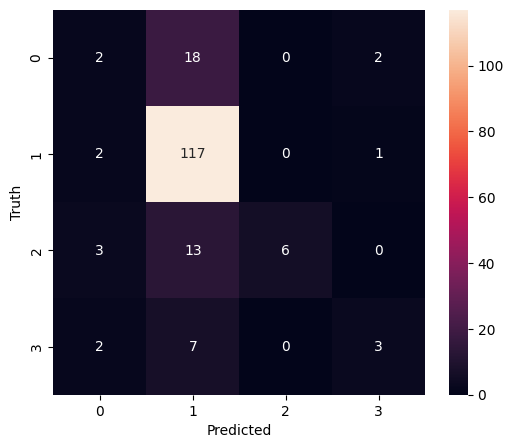

In [22]:
cm = confusion_matrix(y_test, y_predicted)

plt.figure(figsize = (6,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')